<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/DiferenciasDivididasNewton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Diferencias Divididas de Newton

---



---


El método de diferencias divididas de Newton es una técnica de interpolaión usada para encontrar un polinomio que pasa por un conjunto de puntos dados $(x_0,y_0),(x_1,y_1),...(x_n,y_n)$, con $y_i=f(x_i)$




El polinomio de Newton, se construye de la siguiente manera:

$P(x)=f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+...+f[x_0,...,x_n](x-x_0)...(x-x_{n-1})$

De aquí, el método de diferencias divididas de Newton, define a estas diferencias divididas de forma recursiva de la siguiente manera:



*   De orden 0: $f[x_i]=f(x_i)$
*   De orden 1: $f[x_i,x_{i+1}]=\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$
*   De orden 2: $f[x_i,x_{i+1},x_{i+2}]=\frac{f[x_{i+1},x_{i+2}]-f[x_i,x_{i+1}]}{x_{i+2}-x_i}$

y así sucesivamente


A continuación, podemos observar lo siguiente:
+ Un código que lleva a cabo el método de diferencias divididas de Newton
+ Una tabla con los resultados del cálculo de cada una de las diferencias divididas
+ La gráfica del polinomio de interpolación de Newton, mostrando que efectivamente pasa por los puntos indicados
+ El polinomio de interpolación obtenido

In [63]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from  tabulate import tabulate

def diferencias_divididas(x_i,f_i):
  x=sp.symbols('x')
  n=len(x_i)

  #matriz de ceros de tamaño nxn
  Q = [[0 for _ in range(n)] for _ in range(n)]
  P = [1 for _ in range(n)]
  PP=0
  for i in range(n):
    Q[i][0]=f_i[i]

  for j in range(1,n):
    for i in range(j,n):
      Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(x_i[i]-x_i[i-j])

  headers = ["f[x]", "f[x,x]", "f[x,x,x]", "f[x,x,x,x]","f[x,x,x,x,x]"]
  print(tabulate(Q, headers=headers, tablefmt='grid'))

  for j in range(0,n):
    for i in range(j):
      P[j]=P[j]*(x-x_i[i])
    PP=PP+Q[j][j]*P[j]

  # Función evaluable
  f_eval = sp.lambdify(x, PP, 'numpy')

  # Gráfica
  xx = np.linspace(min(x_i), max(x_i), 1000)
  yf = f_eval(xx)
  plt.plot(xx, yf, label='Polinomio de Newton')
  plt.scatter(x_i, f_i, color='red', label='Puntos')
  plt.title('Interpolación por método de Diferencias Divididas')
  plt.grid(True)
  plt.legend()
  plt.show()

  return PP

+----------+-----------+------------+--------------+----------------+
|     f[x] |    f[x,x] |   f[x,x,x] |   f[x,x,x,x] |   f[x,x,x,x,x] |
+==========+===========+============+==============+================+
| 0.765198 |  0        |  0         |    0         |      0         |
+----------+-----------+------------+--------------+----------------+
| 0.620086 | -0.483706 |  0         |    0         |      0         |
+----------+-----------+------------+--------------+----------------+
| 0.455402 | -0.548946 | -0.108734  |    0         |      0         |
+----------+-----------+------------+--------------+----------------+
| 0.281819 | -0.578612 | -0.0494433 |    0.0658784 |      0         |
+----------+-----------+------------+--------------+----------------+
| 0.110362 | -0.571521 |  0.0118183 |    0.0680685 |      0.0018251 |
+----------+-----------+------------+--------------+----------------+


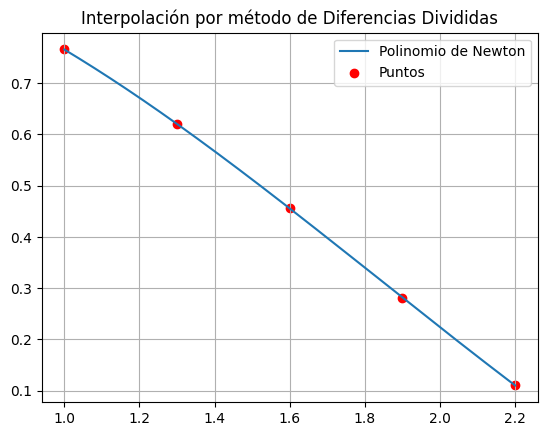

0.00182510288066044*x**4 + 0.0552927983538978*x**3 - 0.343046604938247*x**2 + 0.0733913477366034*x + 0.977735055967085

In [64]:
x_i=[1.0,1.3,1.6,1.9,2.2]
f_i=[0.7651977,0.6200860,0.4554022,0.2818186,0.1103623]
PP=diferencias_divididas(x_i,f_i)
sp.expand(PP)